### Load and Preview Cleaned Data

In [27]:
import pandas as pd
import numpy as np
import ast
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid")

# Load cleaned dataset
df = pd.read_csv("../2_PreparedData/cleaned_reddit_posts.csv")

# Convert the string representation of lists back to real Python lists
df['tokens'] = df['tokens'].apply(ast.literal_eval)

# Check structure
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2974 entries, 0 to 2973
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   title         2974 non-null   object 
 1   score         2974 non-null   int64  
 2   num_comments  2974 non-null   int64  
 3   created_utc   2974 non-null   float64
 4   subreddit     2974 non-null   object 
 5   created_date  2974 non-null   object 
 6   year_month    2974 non-null   object 
 7   clean_title   2974 non-null   object 
 8   tokens        2974 non-null   object 
dtypes: float64(1), int64(2), object(6)
memory usage: 209.2+ KB
None


,title,score,num_comments,created_utc,subreddit,created_date,year_month,clean_title,tokens
0,Joe Biden elected president of the United States,365122,28194,1.604767e+09,news,2020-11-07 16:28:37,2020-11,joe biden elected president of the united states,"[joe, biden, elected, president, united, states]"
1,"Chauvin found guilty of murder, manslaughter i...",250268,27550,1.618953e+09,news,2021-04-20 21:07:44,2021-04,chauvin found guilty of murder manslaughter in...,"[chauvin, found, guilty, murder, manslaughter,..."
2,President Donald Trump says he has tested posi...,233319,33133,1.601615e+09,news,2020-10-02 05:04:17,2020-10,president donald trump says he has tested posi...,"[president, donald, trump, tested, positive, c..."
3,Blizzard Employees Staged a Walkout After the ...,226328,9392,1.570654e+09,news,2019-10-09 20:45:17,2019-10,blizzard employees staged a walkout after the ...,"[blizzard, employees, staged, walkout, company..."
4,Trump has left the White House for the last ti...,222636,11623,1.611149e+09,news,2021-01-20 13:16:44,2021-01,trump has left the white house for the last ti...,"[trump, left, house, last, time, president]"


### Convert to datetime

In [28]:
# Convert the column to datetime
df['created_date'] = pd.to_datetime(df['created_date'])
df['year_month'] = df['created_date'].dt.to_period('M')

### Count the number of posts per subreddit

In [29]:
post_counts = df['subreddit'].value_counts()

print("Number of posts per subreddit:")
print(post_counts)

Number of posts per subreddit:
subreddit
news             500
worldnews        500
technology       499
politics         498
TrueReddit       498
worldpolitics    479
Name: count, dtype: int64


### Posts Over Time by Subreddit

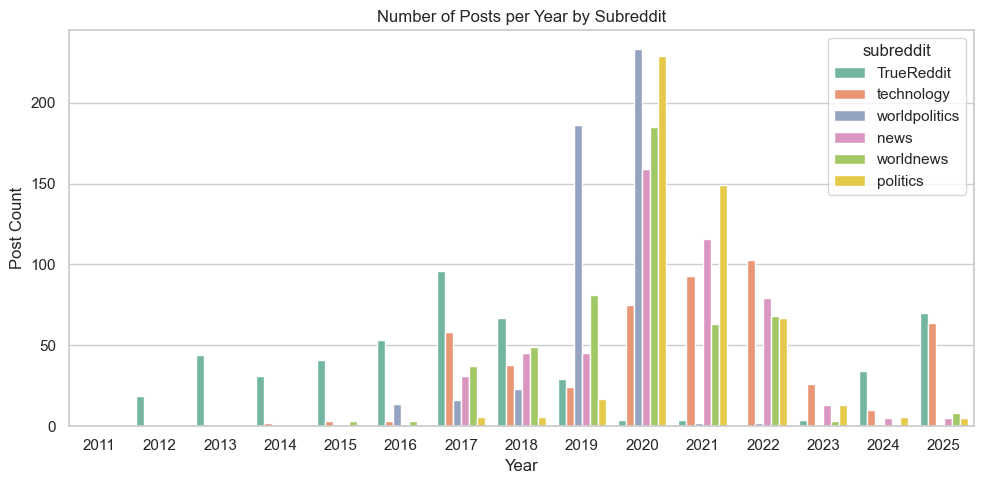

In [30]:
df['year'] = df['created_date'].dt.year

plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='year', hue='subreddit', palette='Set2')
plt.title("Number of Posts per Year by Subreddit")
plt.xlabel("Year")
plt.ylabel("Post Count")
plt.tight_layout()
plt.show()


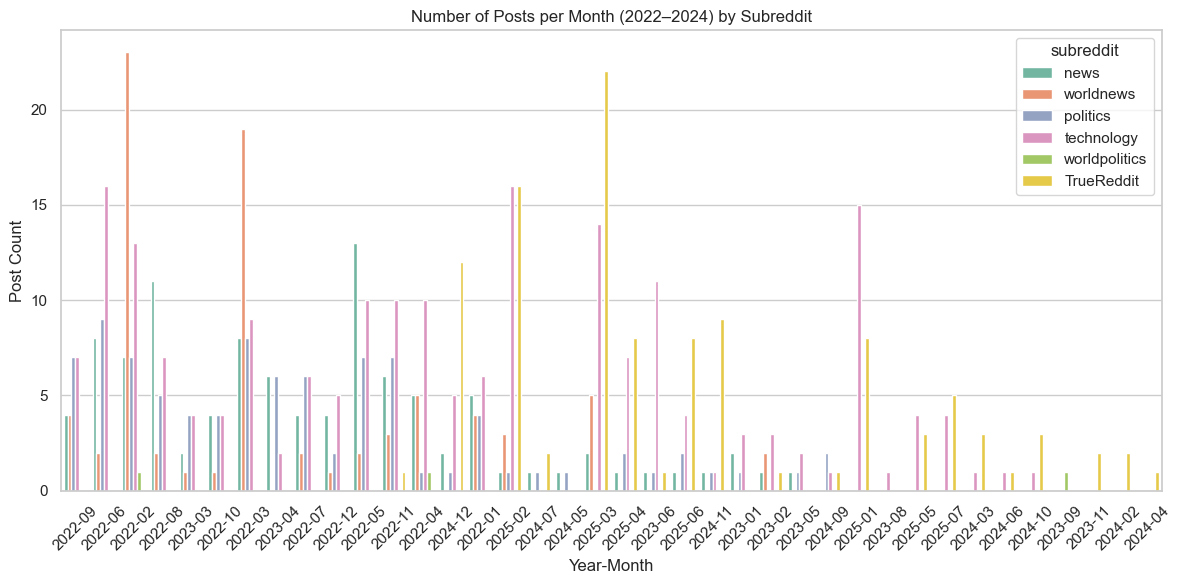

In [31]:
# Filter to recent years
recent_df = df[df['created_date'].dt.year >= 2022]

plt.figure(figsize=(12, 6))
sns.countplot(data=recent_df, x='year_month', hue='subreddit', palette='Set2')
plt.xticks(rotation=45)
plt.title("Number of Posts per Month (2022–2024) by Subreddit")
plt.xlabel("Year-Month")
plt.ylabel("Post Count")
plt.tight_layout()
plt.show()

### Average Score per Year by Subreddit

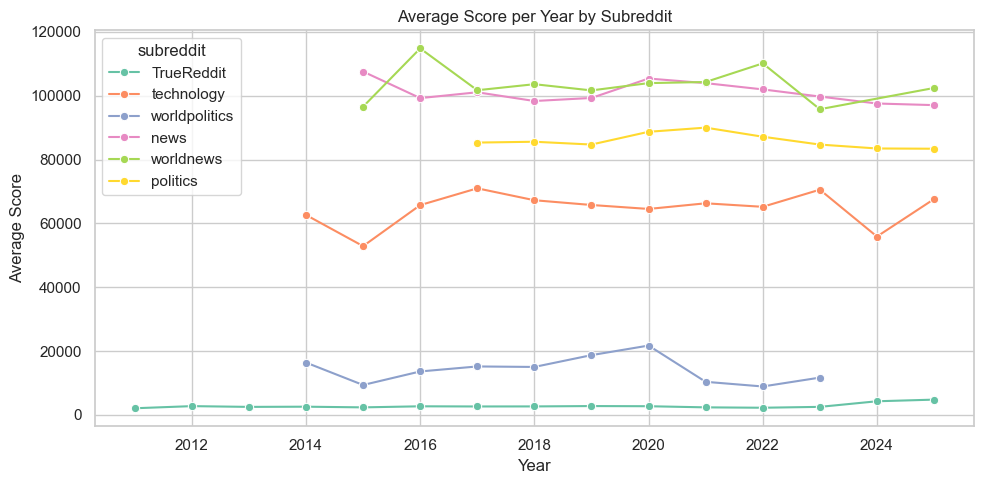

In [32]:
# Group by year
df['year'] = df['created_date'].dt.year
avg_score_year = df.groupby(['year', 'subreddit'])['score'].mean().reset_index()

plt.figure(figsize=(10, 5))
sns.lineplot(data=avg_score_year, x='year', y='score', hue='subreddit', marker='o', palette='Set2')
plt.title("Average Score per Year by Subreddit")
plt.xlabel("Year")
plt.ylabel("Average Score")
plt.tight_layout()
plt.show()


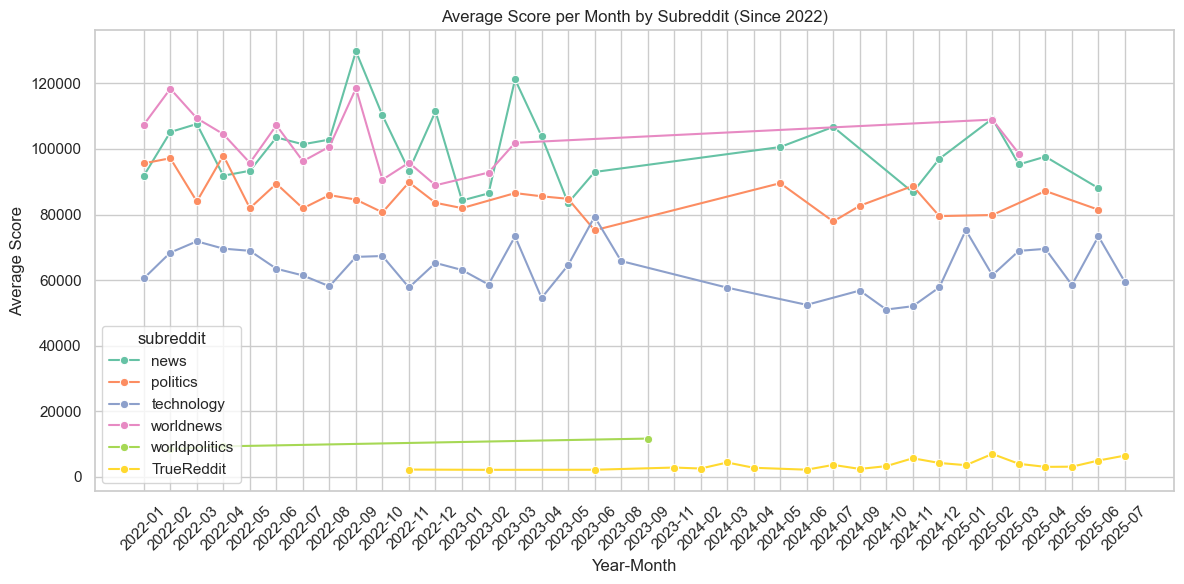

In [33]:
# Filter to recent years
df_recent = df[df['created_date'] >= pd.to_datetime("2022-01-01")].copy()


# Group by year-month 
df_recent['year_month'] = df_recent['created_date'].dt.to_period('M')
avg_score_recent = df_recent.groupby(['year_month', 'subreddit'])['score'].mean().reset_index()
avg_score_recent['year_month_str'] = avg_score_recent['year_month'].astype(str)

plt.figure(figsize=(12, 6))
sns.lineplot(data=avg_score_recent, x='year_month_str', y='score', hue='subreddit', marker='o', palette='Set2')
plt.xticks(rotation=45)
plt.title("Average Score per Month by Subreddit (Since 2022)")
plt.xlabel("Year-Month")
plt.ylabel("Average Score")
plt.tight_layout()
plt.show()


### Average Comments per Post by Subreddit

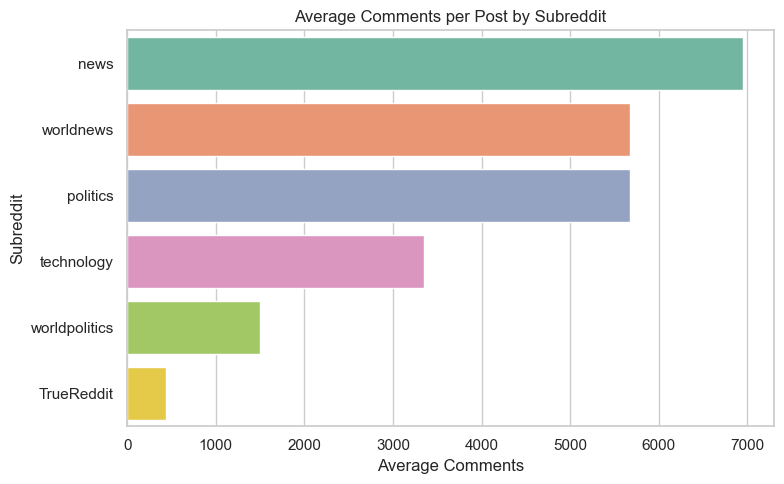

In [34]:
avg_comments = df.groupby('subreddit')['num_comments'].mean().sort_values(ascending=False)
avg_comments_df = avg_comments.reset_index()
plt.figure(figsize=(8, 5))
sns.barplot(data=avg_comments_df, x='num_comments', y='subreddit', hue='subreddit',palette='Set2')
plt.title("Average Comments per Post by Subreddit")
plt.xlabel("Average Comments")
plt.ylabel("Subreddit")
plt.tight_layout()
plt.show()


### Correlation: Score vs. Comments

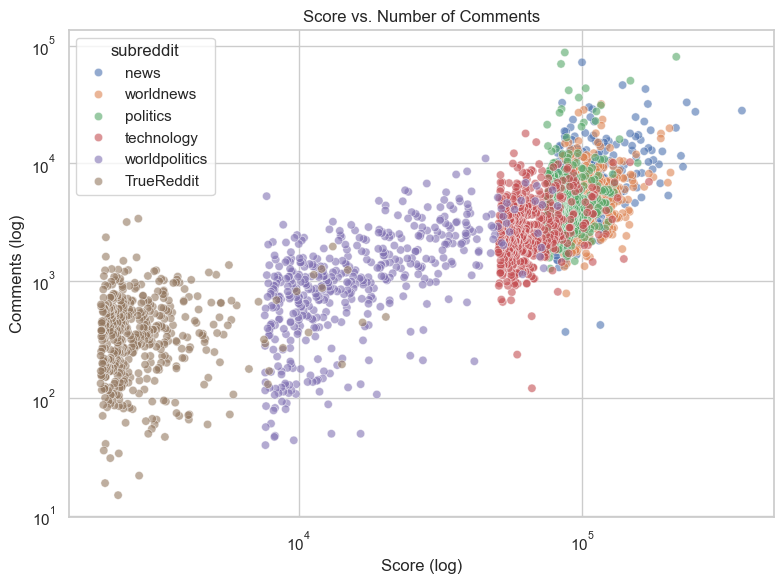

In [35]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='score', y='num_comments', hue='subreddit', alpha=0.6)
plt.xscale("log")
plt.yscale("log")
plt.title("Score vs. Number of Comments")
plt.xlabel("Score (log)")
plt.ylabel("Comments (log)")
plt.tight_layout()
plt.show()


### Text based EDA

### Word frequency per subreddit


Top 15 words in subreddit 'news':
police       38
trump        33
new          22
court        19
dies         17
state        17
guilty       16
charged      16
covid        15
officers     15
found        14
federal      14
prison       14
officer      14
judge        14


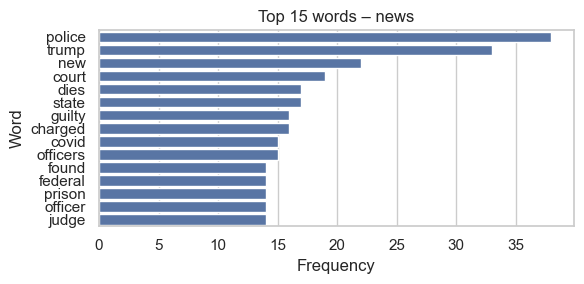


Top 15 words in subreddit 'worldnews':
trump        63
russia       35
coronavirus  34
china        33
new          31
president    28
russian      28
world        28
covid        27
putin        26
ukraine      22
kong         20
hong         19
uk           18
global       17


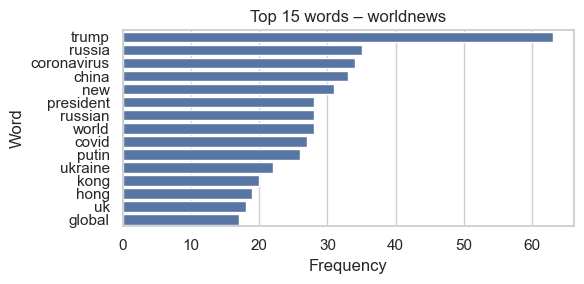


Top 15 words in subreddit 'politics':
trump        154
biden        67
president    31
election     31
house        29
capitol      26
donald       23
senate       22
vote         22
coronavirus  22
calls        22
bill         22
covid        21
sanders      21
trumps       21


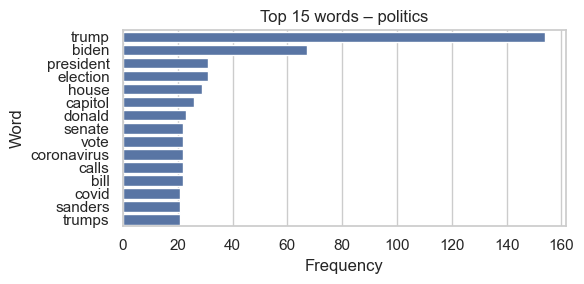


Top 15 words in subreddit 'technology':
neutrality   48
net          47
fcc          44
facebook     44
amazon       36
data         34
reddit       31
twitter      30
trump        27
internet     25
ceo          25
million      25
company      22
users        20
ban          19


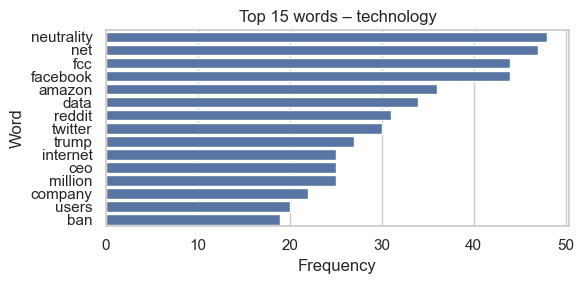


Top 15 words in subreddit 'worldpolitics':
trump        49
bernie       20
president    18
sanders      18
american     10
world        9
shit         9
see          8
supporters   8
every        8
saudi        8
class        7
doesnt       7
house        7
would        7


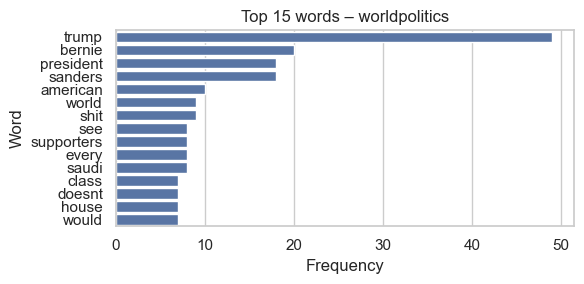


Top 15 words in subreddit 'TrueReddit':
trump        60
american     32
new          24
would        20
americans    20
donald       19
political    19
country      19
government   18
time         18
wealth       18
never        18
even         17
workers      16
money        16


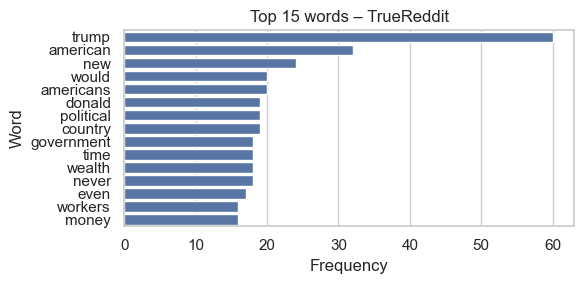

In [36]:
from collections import Counter

TOP_N = 15          # how many words to display

for sub in df['subreddit'].unique():
    # flatten all tokens for this subreddit
    words = df.loc[df['subreddit'] == sub, 'tokens'].explode()
    
    # count frequency
    top_words = Counter(words).most_common(TOP_N)
    
    # print table
    print(f"\nTop {TOP_N} words in subreddit '{sub}':")
    for w, n in top_words:
        print(f"{w:<12} {n}")
    
    # bar-plot
    top_df = pd.DataFrame(top_words, columns=['word', 'freq'])
    plt.figure(figsize=(6, 3))
    sns.barplot(data=top_df, x='freq', y='word')
    plt.title(f"Top {TOP_N} words – {sub}")
    plt.xlabel("Frequency")
    plt.ylabel("Word")
    plt.tight_layout()
    plt.show()

### Word Cloud per subreddit

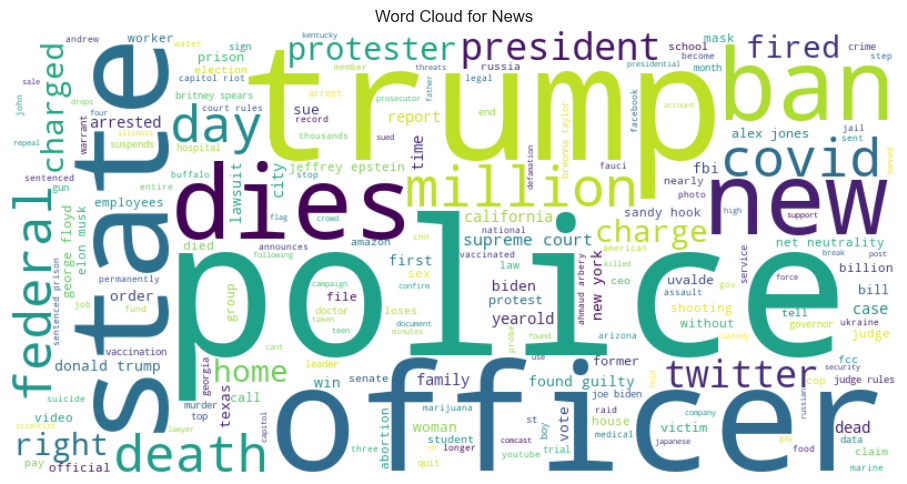

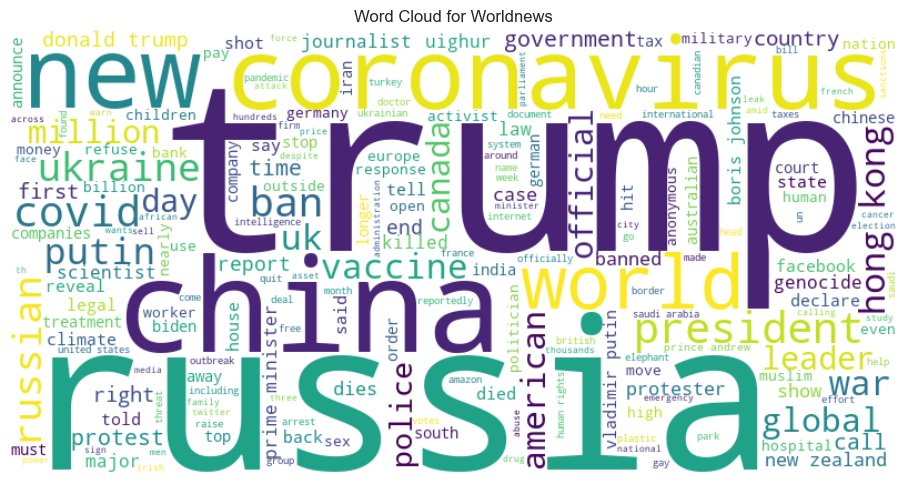

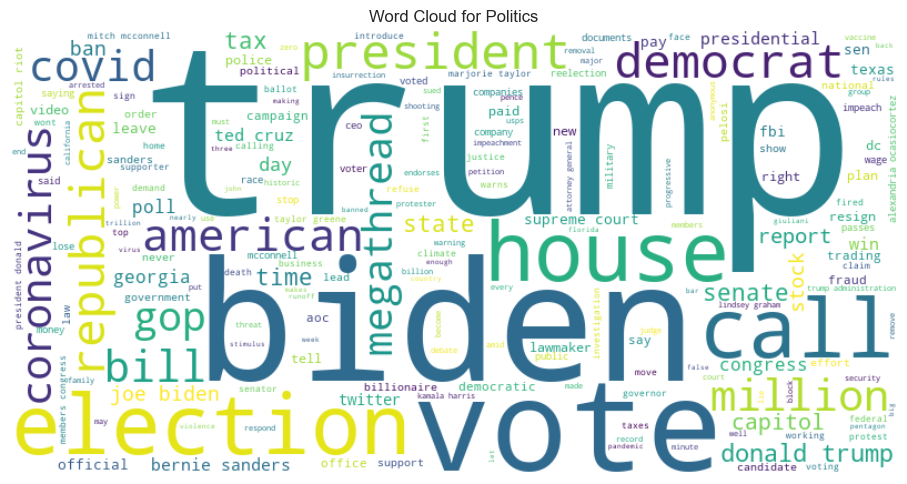

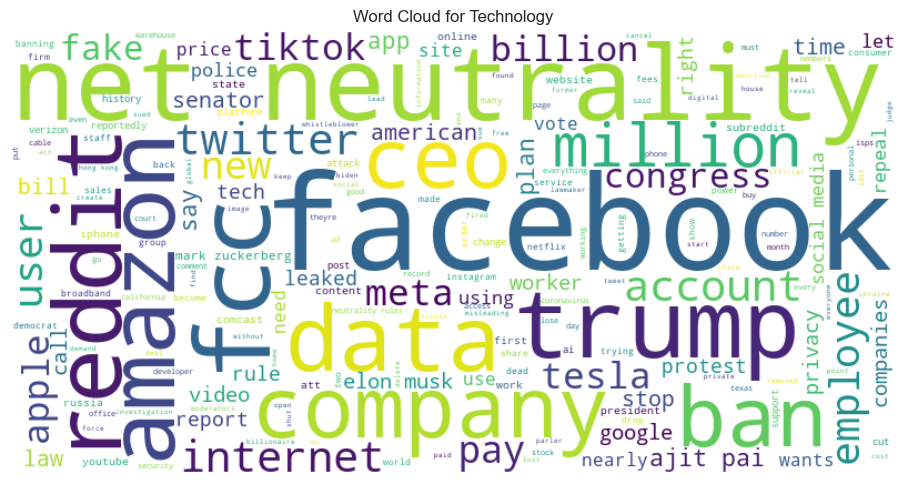

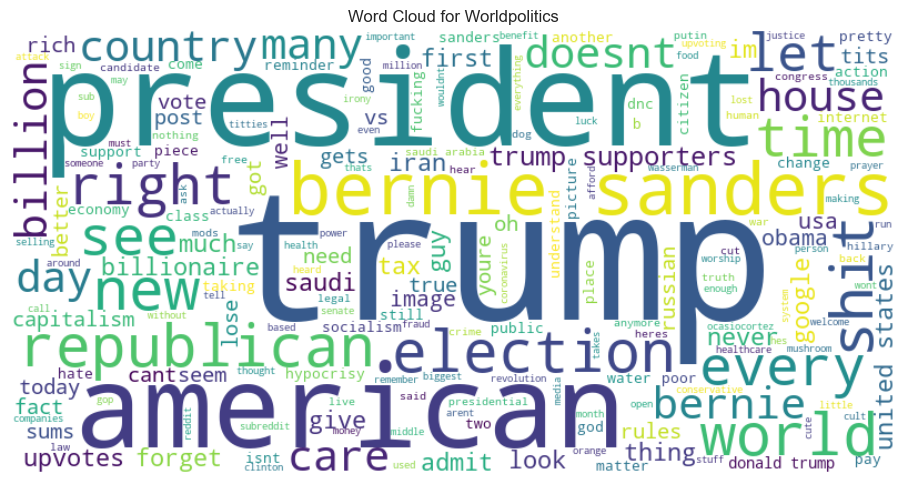

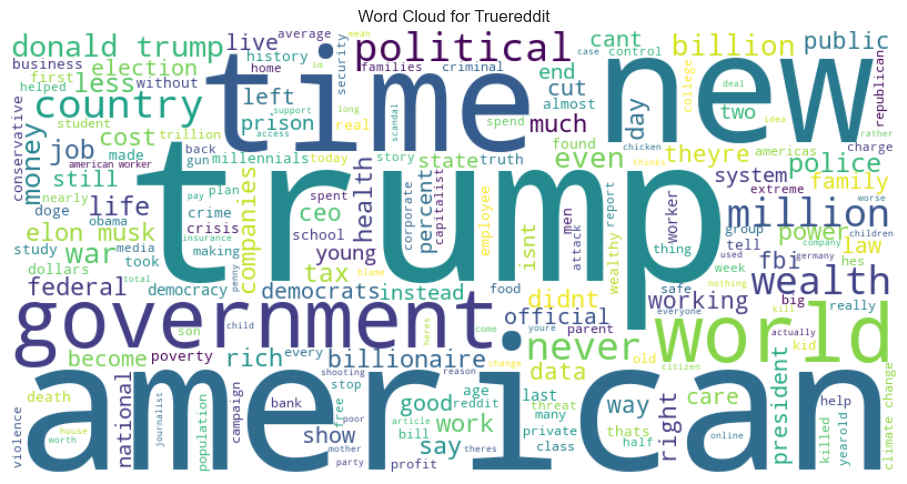

In [37]:
# Quick sanity-check (optional) ---
assert df['tokens'].explode().map(type).eq(str).all(), "Non-string tokens detected!"

# Create Word Cloud per subreddit
from wordcloud import WordCloud

for sub in df['subreddit'].unique():
    words = df.loc[df.subreddit == sub, 'tokens'].explode()
    wc = WordCloud(width=800, height=400, background_color='white')\
            .generate(' '.join(words))
    plt.figure(figsize=(10,5))
    plt.imshow(wc, interpolation='bilinear'); plt.axis('off')
    plt.title(f"Word Cloud for {sub.replace('_',' ').title()}")
    plt.tight_layout(); plt.show()

### Post length and word count analysis

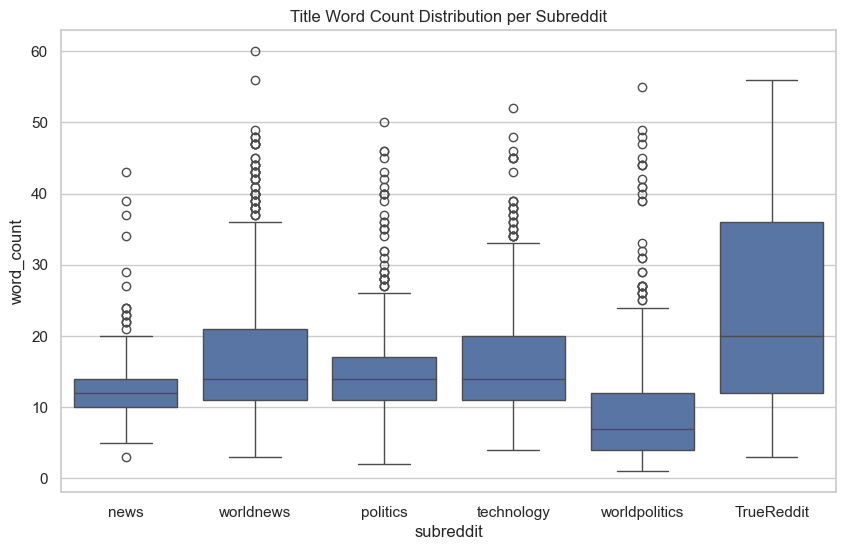

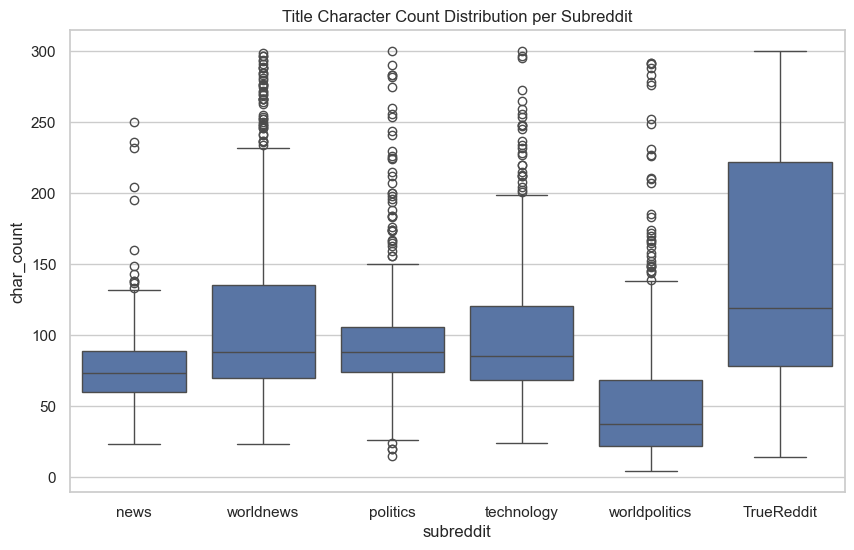

In [38]:
df['word_count'] = df['title'].apply(lambda x: len(x.split()))
df['char_count'] = df['title'].apply(len)

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='subreddit', y='word_count')
plt.title("Title Word Count Distribution per Subreddit")
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='subreddit', y='char_count')
plt.title("Title Character Count Distribution per Subreddit")
plt.show()


### Sentiment Analysis

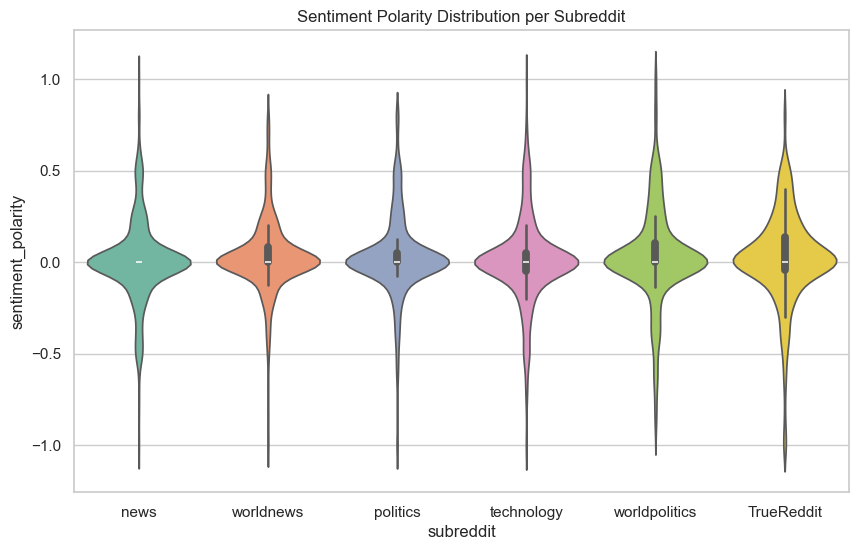

In [39]:
from textblob import TextBlob

df['sentiment_polarity'] = df['title'].apply(lambda x: TextBlob(x).sentiment.polarity)

plt.figure(figsize=(10, 6))
sns.violinplot(data=df, x='subreddit', y='sentiment_polarity', hue='subreddit', palette='Set2')
plt.title("Sentiment Polarity Distribution per Subreddit")
plt.show()

### Engagement vs Sentiment

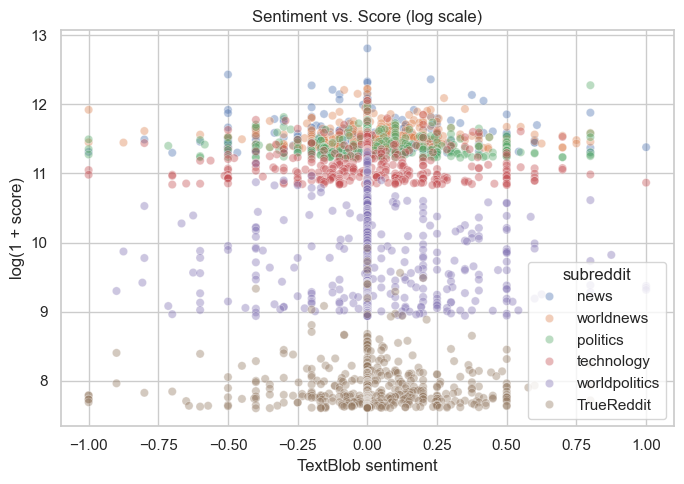

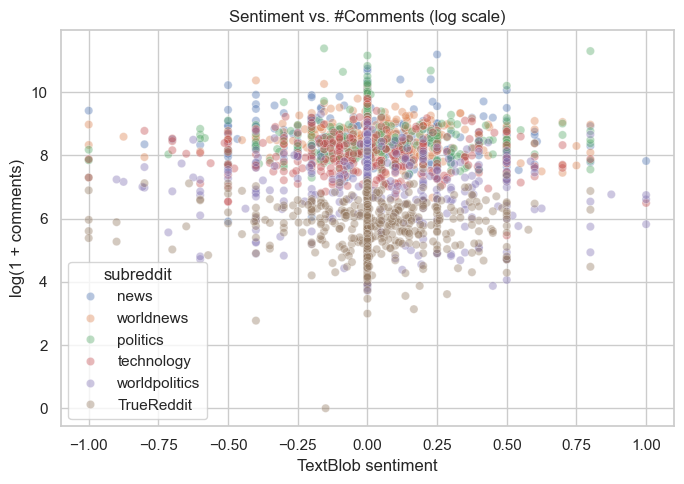

,sentiment_polarity,score,num_comments
sentiment_polarity,1.000000,-0.030000,-0.070000
score,-0.030000,1.000000,0.780000
num_comments,-0.070000,0.780000,1.000000


In [40]:
# Scatter: sentiment vs. score 
plt.figure(figsize=(7,5))
sns.scatterplot(
    data=df,
    x='sentiment_polarity',
    y=np.log1p(df['score']),
    hue='subreddit',
    alpha=0.4
)
plt.title("Sentiment vs. Score (log scale)")
plt.xlabel("TextBlob sentiment")
plt.ylabel("log(1 + score)")
plt.tight_layout()
plt.show()

# Scatter: sentiment vs. num_comments
plt.figure(figsize=(7,5))
sns.scatterplot(
    data=df,
    x='sentiment_polarity',
    y=np.log1p(df['num_comments']),
    hue='subreddit',
    alpha=0.4
)
plt.title("Sentiment vs. #Comments (log scale)")
plt.xlabel("TextBlob sentiment")
plt.ylabel("log(1 + comments)")
plt.tight_layout()
plt.show()

# Simple correlation table
corr = (
    df[['sentiment_polarity','score','num_comments']]
    .corr(method='spearman')        
    .round(2)
)
display(corr.style.background_gradient(cmap="coolwarm"))

### Posting-Hour Heat-Map (UTC)

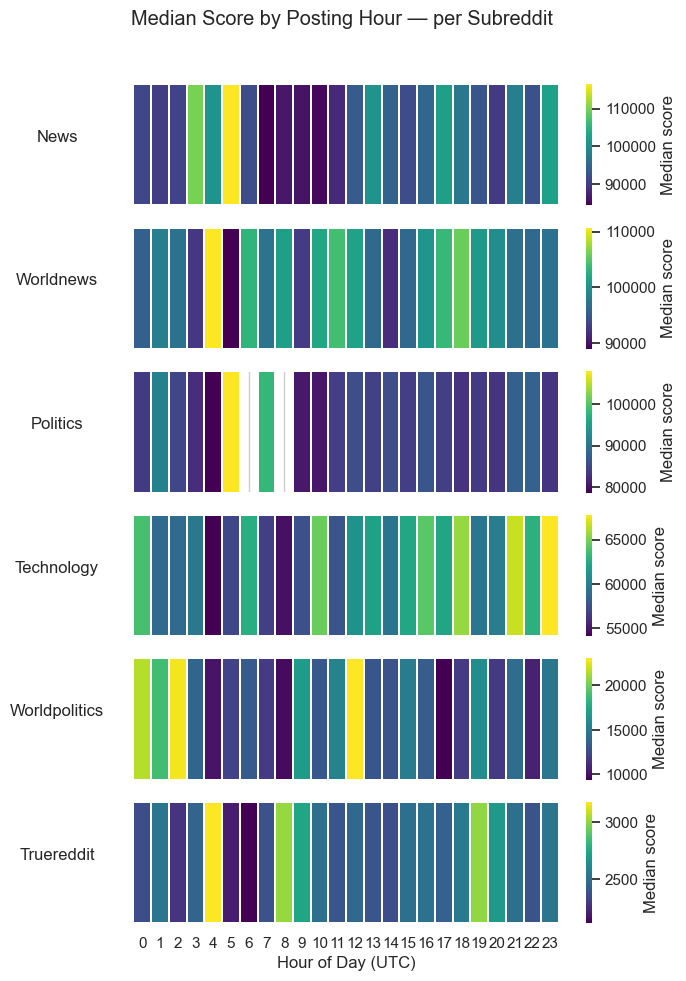

In [43]:
df['hour_utc'] = pd.to_datetime(df['created_date']).dt.hour

subs = df['subreddit'].unique()
fig, axs = plt.subplots(len(subs), 1,
                        figsize=(7, 1.6*len(subs)),
                        sharex=True)

for ax, sub in zip(axs, subs):
    # pivot without filling; NaNs remain
    p = (df[df['subreddit'] == sub]
           .pivot_table(index='hour_utc',
                        values='score', aggfunc='median')
           .reindex(range(24)))           # hours 0-23, NaN where no posts
    
    # build heat-map, masking NaN
    sns.heatmap(p.T, cmap='viridis',
                mask=p.T.isna(),
                ax=ax,
                cbar_kws={'label':'Median score'},
                linewidths=.3)
    
    ax.set_ylabel(sub.replace('_',' ').title(), rotation=0, labelpad=55)
    ax.set_xlabel(''); ax.set_yticks([])

axs[-1].set_xlabel('Hour of Day (UTC)')
fig.suptitle('Median Score by Posting Hour — per Subreddit', y=1.02)
plt.tight_layout(); plt.show()